Dataset Desciption :
Source: https://archive.ics.uci.edu/ml/datasets/Balance+Scale

Generated to model psychological experiments reported by Siegler, R. S. (1976).
Three Aspects of Cognitive Development. Cognitive Psychology, 8, 481-520.

Donor:

Tim Hume (hume '@' ics.uci.edu)

Data Set Information:

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.

Attribute Information:

1. Class Name: 3 (L, B, R)
2. Left-Weight: 5 (1, 2, 3, 4, 5)
3. Left-Distance: 5 (1, 2, 3, 4, 5)
4. Right-Weight: 5 (1, 2, 3, 4, 5)
5. Right-Distance: 5 (1, 2, 3, 4, 5)


Importing Libraries 

In [1]:
#Importing Libraries 
#basics and Visualization
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#ML libraries
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs


#Ignore Warning 
import warnings as wrn
wrn.filterwarnings('ignore')

Reading the csv file

In [2]:
df = pd.read_csv(r'../input/balance-scale.csv')
df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


Calling info to check the number of missing values and datatypes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class         625 non-null object
L-Weight      625 non-null int64
L-Distance    625 non-null int64
R-Weight      625 non-null int64
R-Distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


Label Encoding the 'Class' column so that heatmap can be plotted

Plotting pairplot and heatmap to see the correlation among the attributes

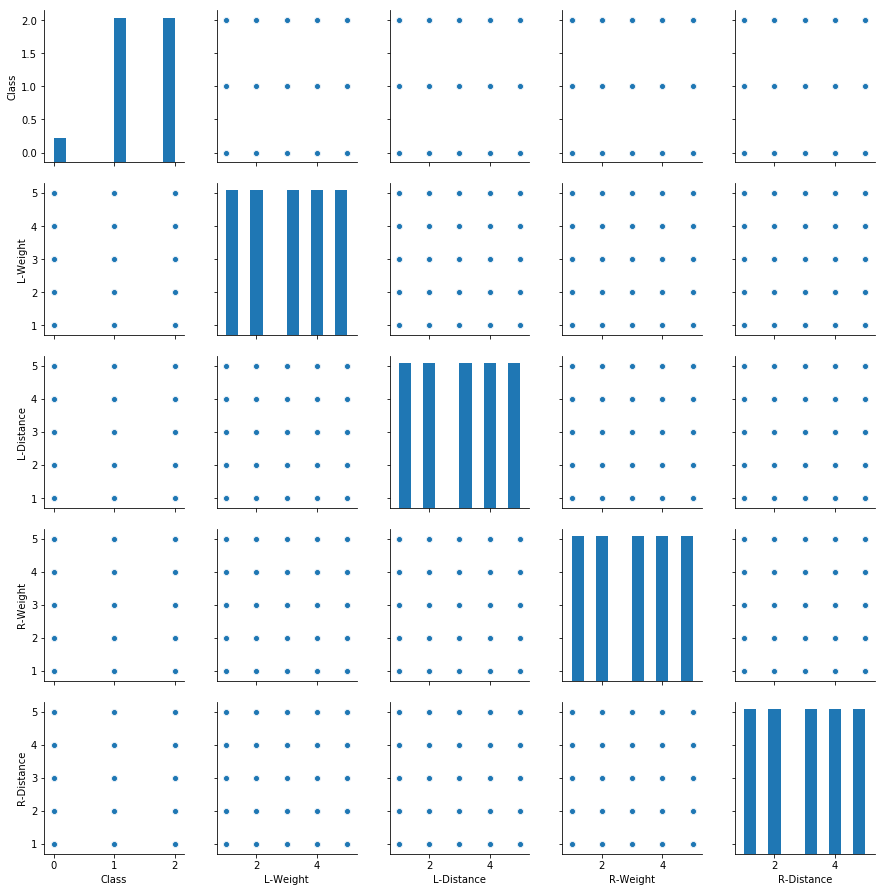

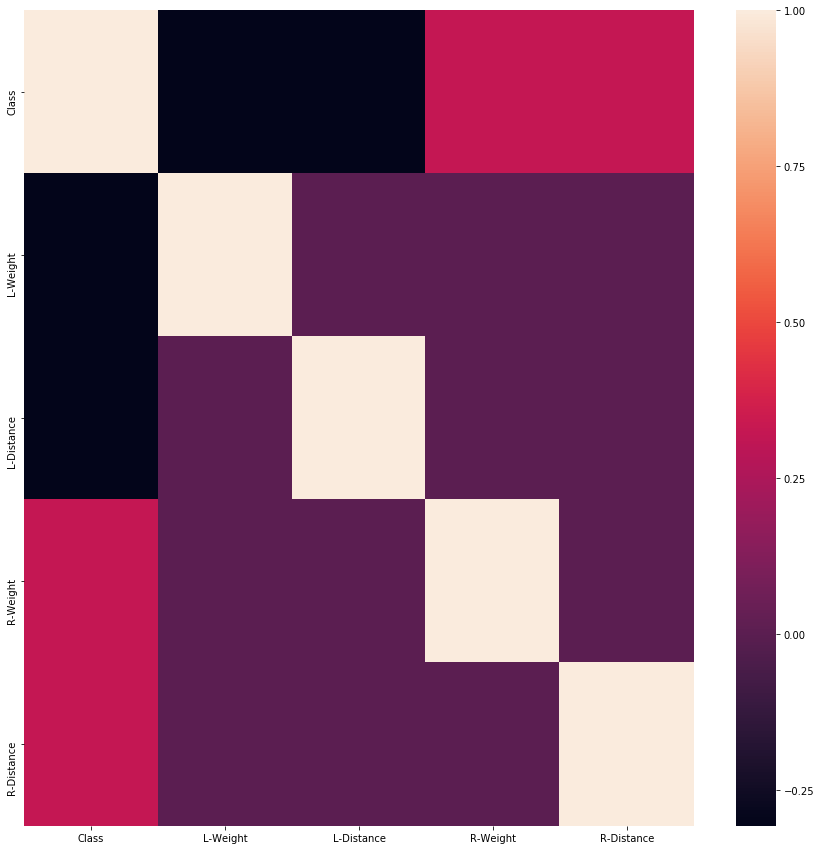

In [4]:
#Visualization after doing label encoding
df['Class'] = LabelEncoder().fit_transform(df['Class'].tolist())
#pairplot
sns.pairplot(data=df)

#Heatmap
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr())


Conclusion : Plots show that the other attributes are equally correlated to Class. 
- Hence, droping other columns except for 'Class' is not required

Seperating features as X and target value as y : 
- 'Class' in y
- 'L-Weight', 'R-Weight', 'L-Distance', 'R-Distance' in X

In [5]:
#Dividing X and y
y = df[['Class']]
X = df.drop(['Class'], axis = 1)

print(y.head())
print(X.head())

   Class
0      0
1      2
2      2
3      2
4      2
   L-Weight  L-Distance  R-Weight  R-Distance
0         1           1         1           1
1         1           1         1           2
2         1           1         1           3
3         1           1         1           4
4         1           1         1           5


Spliting the X and y in four DataFrame :
train_X, test_X, train_y and test_y using rain_test_split

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 20)

Classification and prediction using following Classifiers :

- Extra Tree    Classifier
- Xgboost       Classifier
- Random Forest Classifier
- Decision Tree Classifier
- Support Vector Machine
- K-Nearest Neighbor

In [7]:
#Classification and prediction
#ExtraTreeClassifier

clf = ExtraTreesClassifier(n_estimators=1000)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  80.0


In [8]:
#Classification and prediction
#XGBoost

clf = XGBClassifier(learning_rate=0.5, n_jobs=-1, n_estimators=1000)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  100.0


In [9]:
#Classification and prediction
#Random Forest

clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  85.0


In [10]:
#Classification and prediction
#DT

clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  80.0


In [11]:
#Classification and prediction
#SVM

clf = SVC()
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  95.0


In [12]:
#Classification and prediction
#KNN

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(train_X, train_y)
pred = clf.predict(test_X)
print('Accuracy in percent = ',score(pred, test_y)*100)

Accuracy in percent =  85.0


Result :     Accuracy score of each classifier in percentage 


- Extra Tree    Classifier  : 90
- Xgboost       Classifier  : 95
- Random Forest Classifier  : 90
- Decision Tree Classifier  : 85
- Support Vector Machine    : 95
- K-Nearest Neighbor        : 95


Conclusion :
XGBoost Classifier, SVM, and KNN have best accuracy with 95%

Note : Accuracy will variate at each run of kernel